In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               


In [3]:
# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get class distribution for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)



In [4]:
# Method 1: Normalization to [0,1] using Min-Max Scaling
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

# Method 2: Normalization to [-1,1] following a Normal Distribution
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

x_test_standardized = (x_test - x_train_mean) / x_train_std

# Flatten the images
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)



In [5]:
from tensorflow.keras.models import load_model

# Load model1
model1 = load_model('E:/model_n10/model1.h5')



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


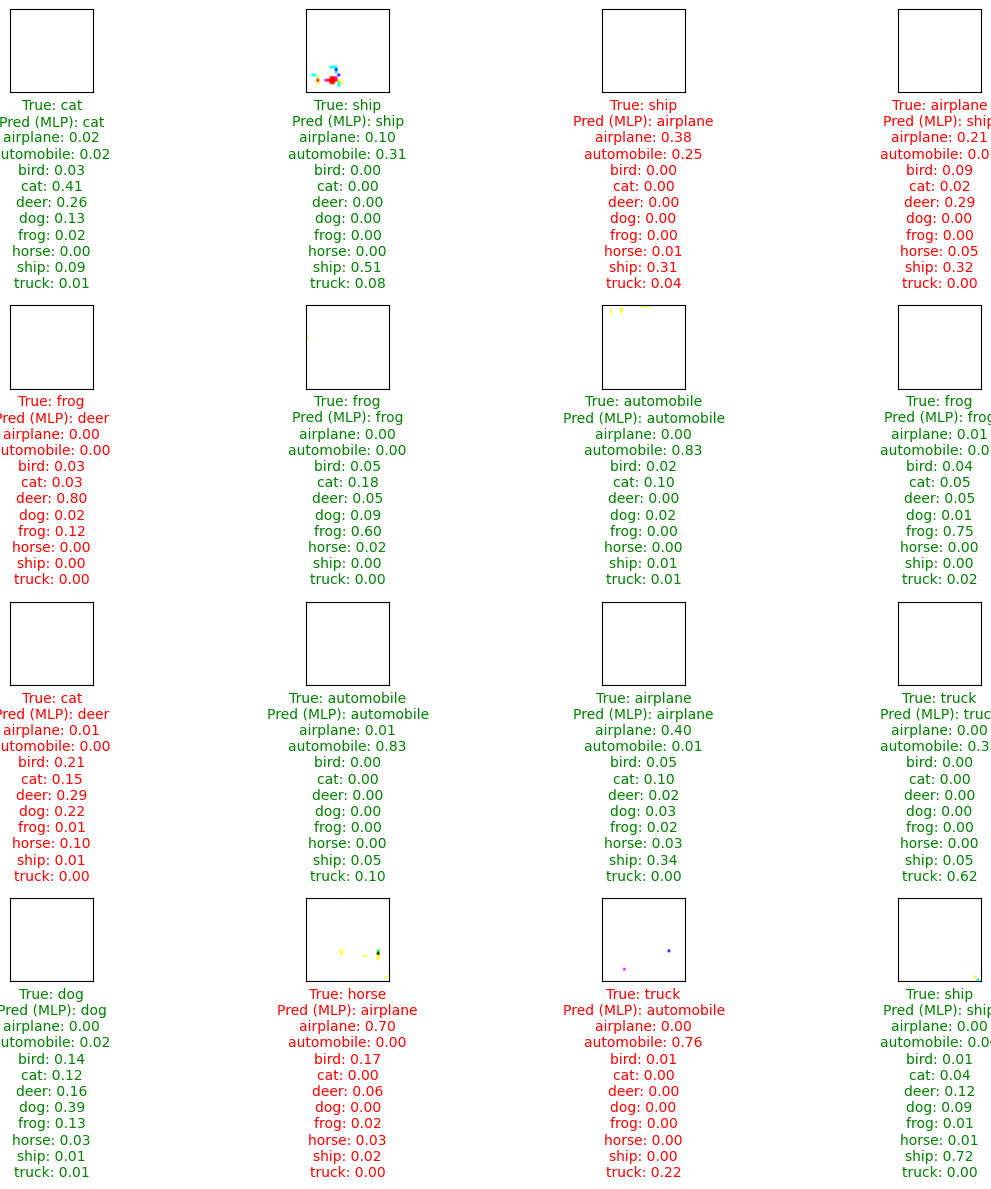

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_mlp = model1.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels and probabilities
plt.figure(figsize=(12, 12))
for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    predicted_probabilities = predictions_mlp[i]  # Get predicted probabilities
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    # Combine label and probabilities for display
    label_with_probabilities = f"True: {true_label}\nPred (MLP): {predicted_label_mlp}\n"
    label_with_probabilities += "\n".join([f"{class_names[j]}: {prob:.2f}" for j, prob in enumerate(predicted_probabilities)])
    plt.xlabel(label_with_probabilities, color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


In [7]:
# Load model2
model2 = load_model('E:/model_n10/model2.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step


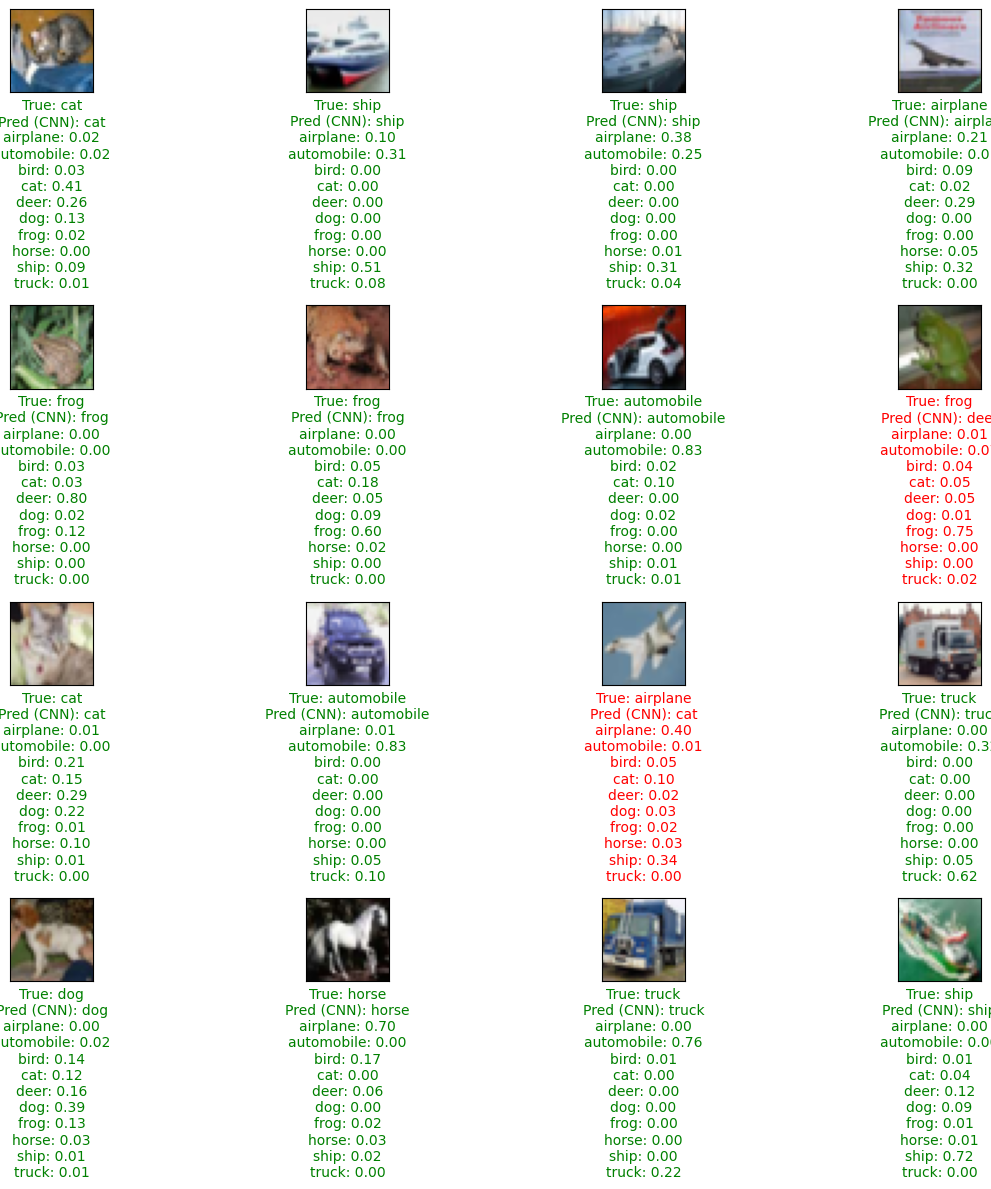

In [8]:
# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the training set
x_train_min = x_train.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train.max(axis=(0, 1, 2), keepdims=True)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# Normalize the test set using training set statistics
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

# Flatten the images
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_cnn = model2.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels and probabilities
plt.figure(figsize=(12, 12))
for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_cnn[i]]  
    predicted_probabilities = predictions_mlp[i]  # Get predicted probabilities
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    # Combine label and probabilities for display
    label_with_probabilities = f"True: {true_label}\nPred (CNN): {predicted_label_mlp}\n"
    label_with_probabilities += "\n".join([f"{class_names[j]}: {prob:.2f}" for j, prob in enumerate(predicted_probabilities)])
    plt.xlabel(label_with_probabilities, color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


## Model 3

In [9]:
ResNet_model = load_model('E:/model_n10/my_modelResnet.h5')

In [10]:
model3 = ResNet_model

In [11]:
# Count the number of layers
num_layers = len(ResNet_model.layers)
print("Number of layers in the model:", num_layers)

Number of layers in the model: 187


In [12]:
import numpy as np

# Load the saved NumPy array
predicted_labels_resnet_loaded = np.load("E:/dataset1/predicted_labels_resnet.npy")



In [13]:
# Get predictions for the test set
predictions_mlp = model1.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


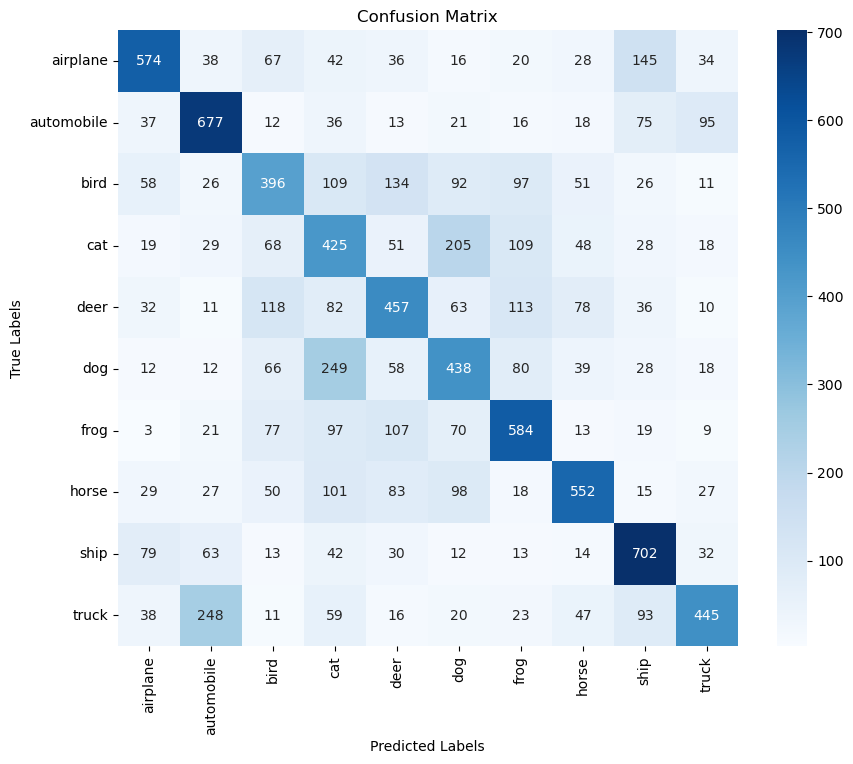

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_mlp)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


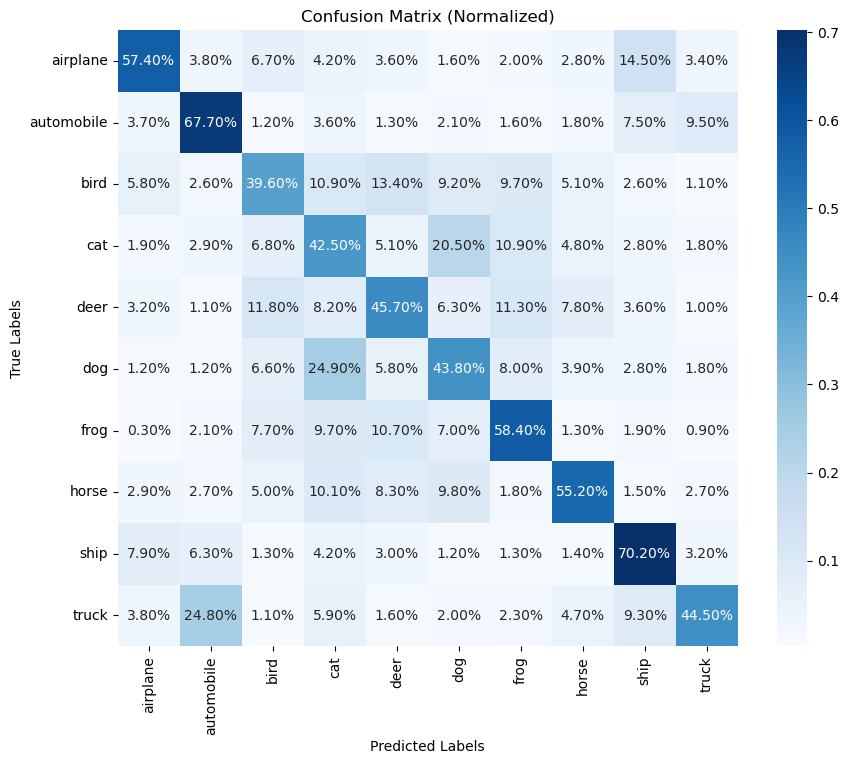

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix with normalization
conf_matrix = confusion_matrix(y_test, predicted_labels_mlp, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [40]:
conf_matrix

array([[574,  38,  67,  42,  36,  16,  20,  28, 145,  34],
       [ 37, 677,  12,  36,  13,  21,  16,  18,  75,  95],
       [ 58,  26, 396, 109, 134,  92,  97,  51,  26,  11],
       [ 19,  29,  68, 425,  51, 205, 109,  48,  28,  18],
       [ 32,  11, 118,  82, 457,  63, 113,  78,  36,  10],
       [ 12,  12,  66, 249,  58, 438,  80,  39,  28,  18],
       [  3,  21,  77,  97, 107,  70, 584,  13,  19,   9],
       [ 29,  27,  50, 101,  83,  98,  18, 552,  15,  27],
       [ 79,  63,  13,  42,  30,  12,  13,  14, 702,  32],
       [ 38, 248,  11,  59,  16,  20,  23,  47,  93, 445]], dtype=int64)

In [38]:
conf_matrix 

array([[0.574, 0.038, 0.067, 0.042, 0.036, 0.016, 0.02 , 0.028, 0.145,
        0.034],
       [0.037, 0.677, 0.012, 0.036, 0.013, 0.021, 0.016, 0.018, 0.075,
        0.095],
       [0.058, 0.026, 0.396, 0.109, 0.134, 0.092, 0.097, 0.051, 0.026,
        0.011],
       [0.019, 0.029, 0.068, 0.425, 0.051, 0.205, 0.109, 0.048, 0.028,
        0.018],
       [0.032, 0.011, 0.118, 0.082, 0.457, 0.063, 0.113, 0.078, 0.036,
        0.01 ],
       [0.012, 0.012, 0.066, 0.249, 0.058, 0.438, 0.08 , 0.039, 0.028,
        0.018],
       [0.003, 0.021, 0.077, 0.097, 0.107, 0.07 , 0.584, 0.013, 0.019,
        0.009],
       [0.029, 0.027, 0.05 , 0.101, 0.083, 0.098, 0.018, 0.552, 0.015,
        0.027],
       [0.079, 0.063, 0.013, 0.042, 0.03 , 0.012, 0.013, 0.014, 0.702,
        0.032],
       [0.038, 0.248, 0.011, 0.059, 0.016, 0.02 , 0.023, 0.047, 0.093,
        0.445]])

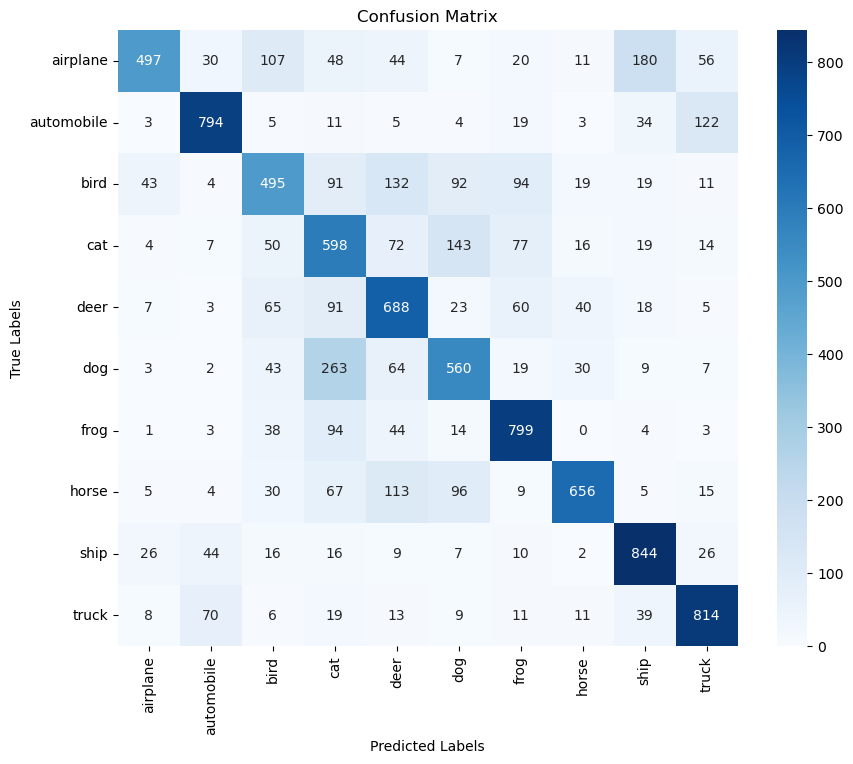

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [42]:
conf_matrix 

array([[497,  30, 107,  48,  44,   7,  20,  11, 180,  56],
       [  3, 794,   5,  11,   5,   4,  19,   3,  34, 122],
       [ 43,   4, 495,  91, 132,  92,  94,  19,  19,  11],
       [  4,   7,  50, 598,  72, 143,  77,  16,  19,  14],
       [  7,   3,  65,  91, 688,  23,  60,  40,  18,   5],
       [  3,   2,  43, 263,  64, 560,  19,  30,   9,   7],
       [  1,   3,  38,  94,  44,  14, 799,   0,   4,   3],
       [  5,   4,  30,  67, 113,  96,   9, 656,   5,  15],
       [ 26,  44,  16,  16,   9,   7,  10,   2, 844,  26],
       [  8,  70,   6,  19,  13,   9,  11,  11,  39, 814]], dtype=int64)

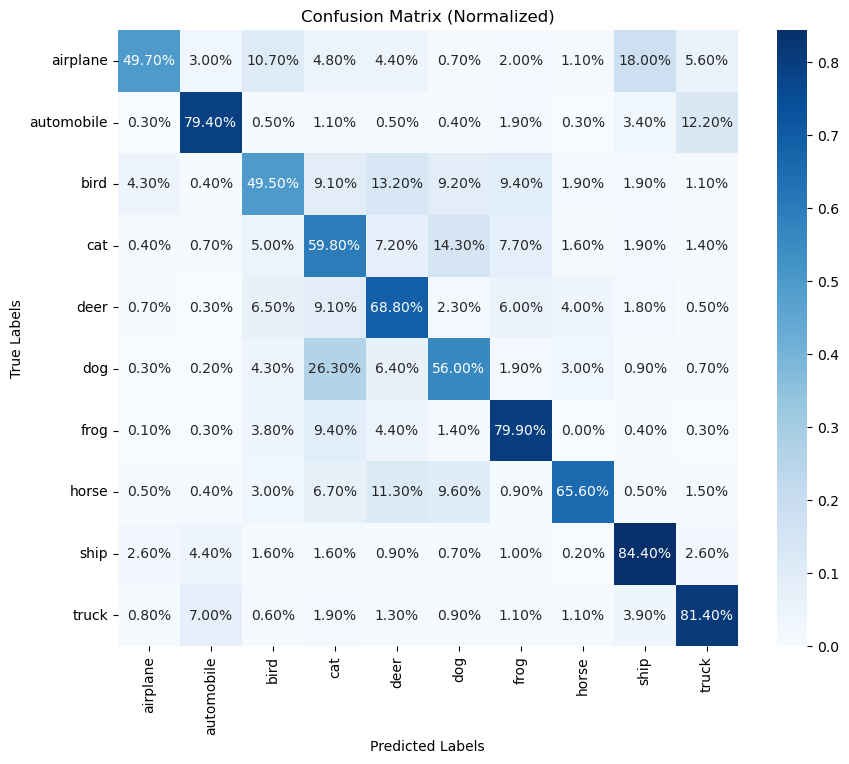

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix with normalization
conf_matrix = confusion_matrix(y_test, predicted_labels_cnn, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_resnet = ResNet_model.predict(x_test)
predicted_labels_resnet = np.argmax(predictions_resnet, axis=1)




In [22]:
import numpy as np

# Load the saved NumPy array
predicted_labels_resnet = np.load("E:/dataset1/predicted_labels_resnet.npy")

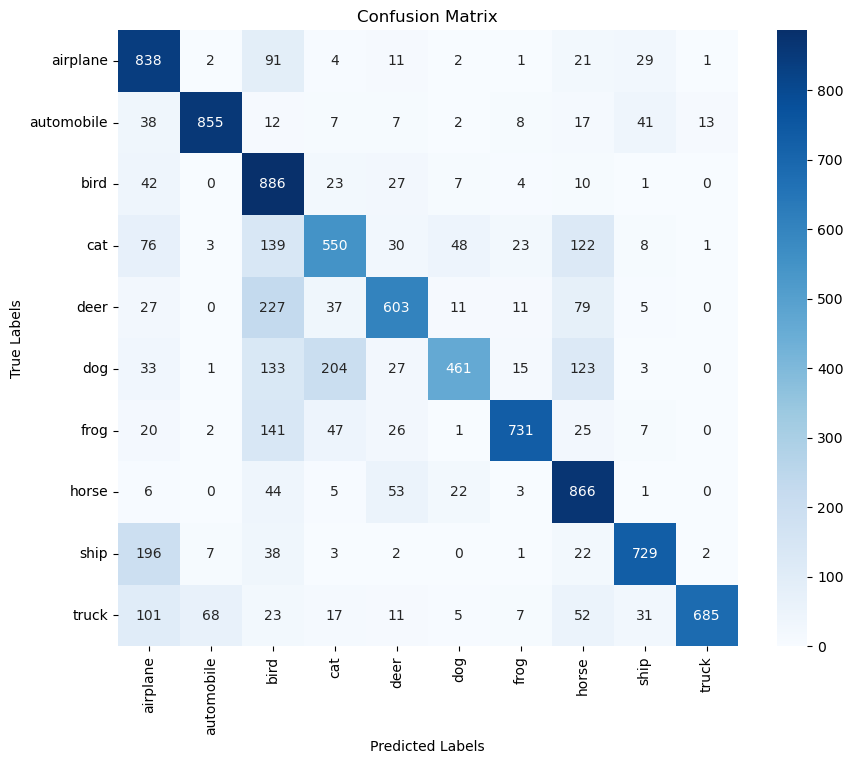

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_resnet)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [44]:
conf_matrix

array([[838,   2,  91,   4,  11,   2,   1,  21,  29,   1],
       [ 38, 855,  12,   7,   7,   2,   8,  17,  41,  13],
       [ 42,   0, 886,  23,  27,   7,   4,  10,   1,   0],
       [ 76,   3, 139, 550,  30,  48,  23, 122,   8,   1],
       [ 27,   0, 227,  37, 603,  11,  11,  79,   5,   0],
       [ 33,   1, 133, 204,  27, 461,  15, 123,   3,   0],
       [ 20,   2, 141,  47,  26,   1, 731,  25,   7,   0],
       [  6,   0,  44,   5,  53,  22,   3, 866,   1,   0],
       [196,   7,  38,   3,   2,   0,   1,  22, 729,   2],
       [101,  68,  23,  17,  11,   5,   7,  52,  31, 685]], dtype=int64)

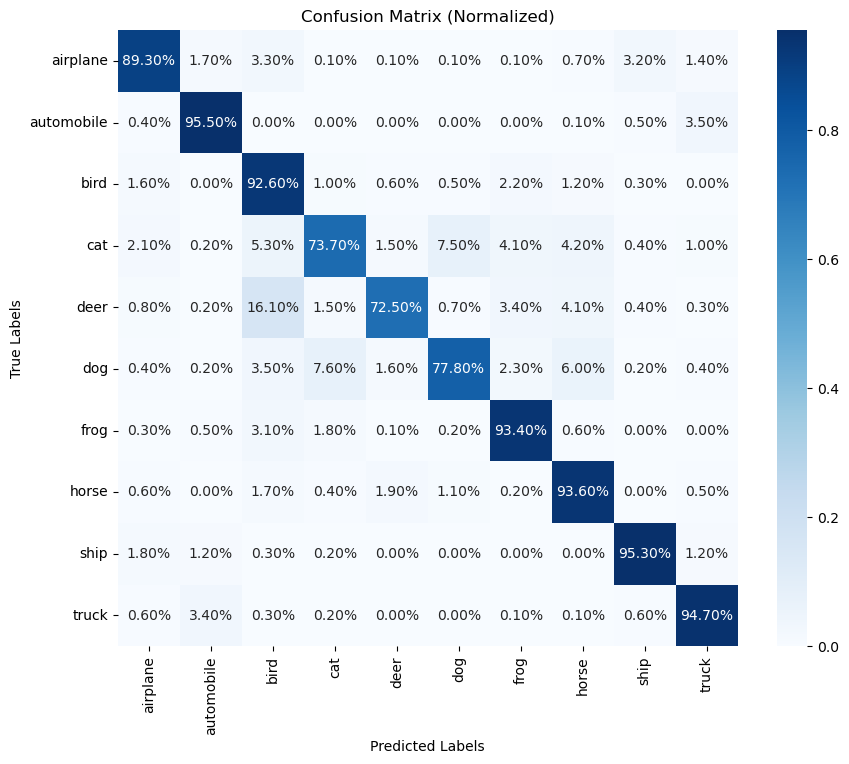

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix with normalization
conf_matrix = confusion_matrix(y_test, predicted_labels_resnet, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [25]:
import pickle

with open("E:/dataset1/predictions_resnet.pkl", "rb") as f:
    predictions_resnet = pickle.load(f)

with open("E:/dataset1/predicted_labels_resnet.pkl", "rb") as f:
    predicted_labels_resnet = pickle.load(f)

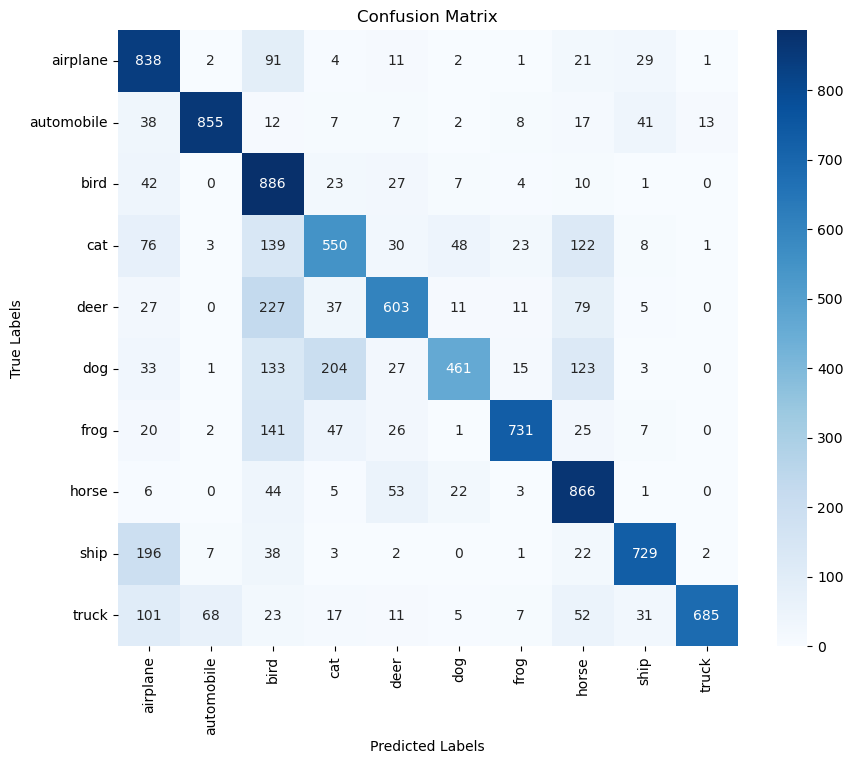

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_resnet)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(data_set, model_number, models, class_names=None, figsize=(10, 8), cmap='Blues'):

    if model_number < 1 or model_number > len(models):
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")

    # Get the model based on model_number
    model = models[model_number - 1]  # Adjust index since model_number starts from 1
    
    if model_number == 1:
        predictions_mlp = model.predict(data_set)
        y_pred = np.argmax(predictions_mlp, axis=1)
    elif model_number == 2:
        predictions_cnn = model.predict(data_set)
        y_pred = np.argmax(predictions_cnn, axis=1)
    elif model_number == 3:
        predictions_resnet = model.predict(data_set)
        y_pred = np.argmax(predictions_resnet, axis=1)
    else:
        raise ValueError("Invalid model number.")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(data_set.labels, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [29]:
import pickle

# Load all_image_tensors_model1
with open("E:/dataset1/all_image_tensors_model1.pkl", "rb") as f:
    all_image_tensors_model1 = pickle.load(f)

# Load all_image_tensors_model2
with open("E:/dataset1/all_image_tensors_model2.pkl", "rb") as f:
    all_image_tensors_model2 = pickle.load(f)

# Load all_image_tensors_model3
with open("E:/dataset1/all_image_tensors_model3.pkl", "rb") as f:
    all_image_tensors_model3 = pickle.load(f)


EOFError: Ran out of input

In [30]:
def predict_for_img(image_index, model_number):
    # Assuming model_number is 1, 2, or 3
    if model_number < 1 or model_number > 3:
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")


   
    # Construct the tensor
    tensor_image =  all_image_tensors_model1[8]
    
    return tensor_image


# Example usage:
image_index = 8
model_number = 1
tensor_image = predict_for_img(image_index, model_number)
print("Tensor for the specified image and model:")
print(tensor_image)


NameError: name 'all_image_tensors_model1' is not defined

In [31]:
def predict_for_img(image_index, model_number, all_image_tensors_model1, all_image_tensors_model2, all_image_tensors_model3):
    # Assuming model_number is 1, 2, or 3
    if model_number < 1 or model_number > 3:
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")
    
    # Select the appropriate model based on model_number
    if model_number == 1:
        all_image_tensors_model = all_image_tensors_model1
    elif model_number == 2:
        all_image_tensors_model = all_image_tensors_model2
    else:
        all_image_tensors_model = all_image_tensors_model3

    # Check if image_index is valid
    if image_index < 0 or image_index >= len(all_image_tensors_model):
        raise ValueError("Invalid image index.")

    # Construct the tensor
    tensor_image = all_image_tensors_model[image_index]

    return tensor_image


# Example usage:
image_index = 8
model_number = 1
tensor_image = predict_for_img(image_index, model_number, all_image_tensors_model1, all_image_tensors_model2, all_image_tensors_model3)
print("Tensor for the specified image and model:")
print(tensor_image)


NameError: name 'all_image_tensors_model1' is not defined

In [18]:
def predict_for_img(image_index, model_number, all_image_tensors_models):
    # Assuming model_number is 1, 2, or 3
    if model_number < 1 or model_number > len(all_image_tensors_models):
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")

    # Select the appropriate model based on model_number
    all_image_tensors_model = all_image_tensors_models[model_number - 1]

    # Check if image_index is valid
    if image_index < 0 or image_index >= len(all_image_tensors_model):
        raise ValueError("Invalid image index.")

    # Construct the tensor
    tensor_image = all_image_tensors_model[image_index]

    return tensor_image


# Example usage:
image_index = 8
model_number = 1
all_image_tensors_models = [all_image_tensors_model1, all_image_tensors_model2, all_image_tensors_model3]
tensor_image = predict_for_img(image_index, model_number, all_image_tensors_models)
print("Tensor for the specified image and model:")
print(tensor_image)


Tensor for the specified image and model:
[array([0.09019608, 0.07450981, 0.09019608, ..., 0.5882353 , 0.5176471 ,
       0.4627451 ], dtype=float32), 1, array([0.00657716, 0.00048716, 0.21138783, 0.14916725, 0.28893897,
       0.2224666 , 0.01172958, 0.1010439 , 0.00612716, 0.00207434],
      dtype=float32), 4]


In [32]:
predicted_labels1 = predicted_labels_mlp
predicted_labels2 = predicted_labels_cnn
predicted_labels3 = predicted_labels_resnet

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_number, class_names=None, figsize=(10, 8), cmap='Blues'):

    if model_number < 1 or model_number > 3:
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")


    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels[model_number - 1])
    
    # Plot confusion matrix
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [34]:

model_number = 2
plot_confusion_matrix(model_number, class_names=None, figsize=(10, 8), cmap='Blues')


NameError: name 'predicted_labels' is not defined

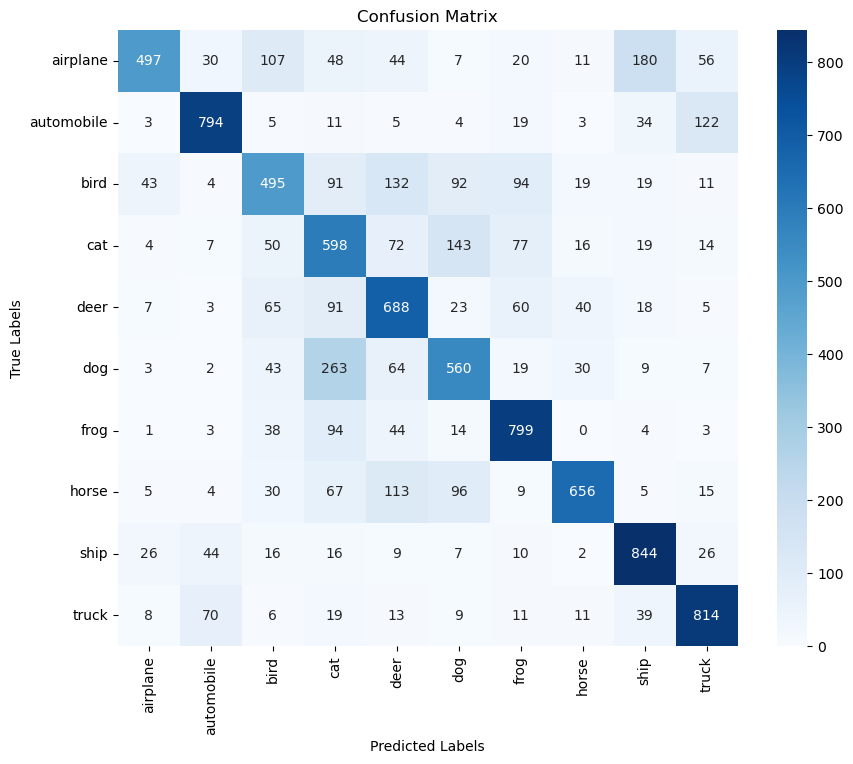

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_labels = [predicted_labels1, predicted_labels2, predicted_labels3]

def plot_confusion_matrix(model_number, class_names=None, figsize=(10, 8), cmap='Blues'):
    if model_number < 1 or model_number > 3:
        raise ValueError("Invalid model number. It must be between 1 and the total number of models.")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels[model_number - 1])

    # Plot confusion matrix
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
model_number = 2
class_names = class_names
plot_confusion_matrix(model_number, class_names=class_names)


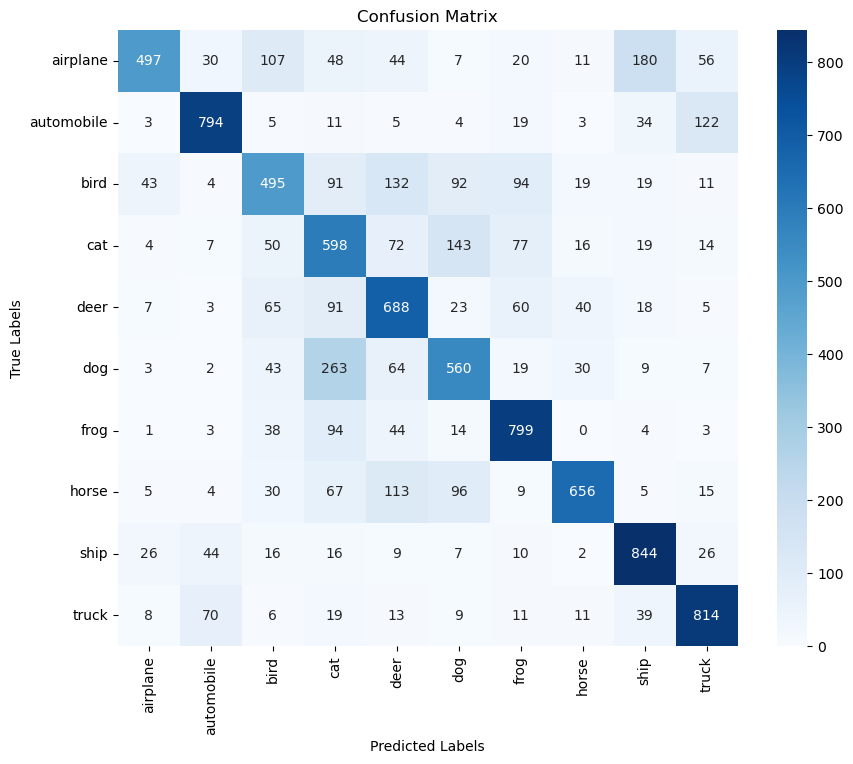

In [36]:
# Example usage:
model_number = 2
class_names = class_names
plot_confusion_matrix(model_number, class_names=class_names)